# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [42]:
import pandas as pd

# data_name = "data.csv"
data = pd.read_csv("data.csv")

# разделить plans_university и past_failures

data['plans_university'] = [int(str(i)[0:-1]) for i in data['plans_universitypast_failures']]
data['past_failures'] = [int(str(i)[-1]) for i in data['plans_universitypast_failures']]

data = data.drop(columns=['plans_universitypast_failures'])

print(data)

     age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  Dalc  \
0     16     4     4           1          2       5         4    4.0   1.0   
1     17     4     4           1          1       5         3    4.0   1.0   
2     16     1     1           2          1       4         5    5.0   2.0   
3     18     1     2           2          1       3         4    4.0   2.0   
4     17     2     1           2          2       4         2    5.0   1.0   
..   ...   ...   ...         ...        ...     ...       ...    ...   ...   
644   18     2     2           4          2       4         2    5.0   1.0   
645   15     4     4           2          2       4         3    1.0   1.0   
646   21     1     1           2          2       5         3    3.0   5.0   
647   16     2     2           1          1       4         3    4.0   1.0   
648   16     2     3          40          2       4         5    4.0   1.0   

     Walc  health  sex_M  address_U  famsize_LE3  Pstatus_T  nu

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

__(+1 балл)__

Дополнительно сравните качество замены на среднее по столбцу и на медиану по столбцу


*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [43]:
missing = data.isnull()

for x in missing:
    avg_value = data[x].mean()
    z = list(missing[x])
    data[x].loc[z] = avg_value

data.describe()

C:\Users\vinik\AppData\Local\Temp\ipykernel_13412\3232732535.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x].loc[z] = avg_value


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,50.164869,2.514638,2.306626,1.747304,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,254.768848,1.134552,1.099931,2.716138,0.829510,0.955717,1.051093,1.174843,0.917715,1.279797,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1991.000000,4.000000,4.000000,50.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [44]:
missing = data.isnull()

for x in missing:
    avg_value = data[x].median()
    z = list(missing[x])
    data[x].loc[z] = avg_value

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,50.164869,2.514638,2.306626,1.747304,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,254.768848,1.134552,1.099931,2.716138,0.829510,0.955717,1.051093,1.174843,0.917715,1.279797,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1991.000000,4.000000,4.000000,50.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [46]:
def normalize(data):
    normalized_data = data.copy()
#     print(normalized_data)
    for v in data:
        dispersion = normalized_data[v].std()
        avg = normalized_data[v].mean()
        normalized_data[v] = (normalized_data[v] - avg) / dispersion
    
    return normalized_data

normalized_data = normalize(data)    

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [47]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import numpy as np
import random
from sklearn.model_selection import cross_validate

model = linear_model.LinearRegression()

score = []

with open("scores.csv", 'r') as f:
    for line in f:
        score.append(float(line) / 100)

# model.fit(normalized_data, score)

# print(normalized_data)

results = cross_val_score(model, normalized_data, score)

print(results)
print(results.mean())

[0.18116486 0.26798748 0.14145938 0.27352802 0.13452804]
0.19973355695607214


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Попробуйте несколько способов добавления полных данных

In [48]:
attendance = pd.read_csv('attendance.csv', sep=';')
missing_attendance = attendance.isnull()

for v in attendance:
    z = list(missing_attendance[v])
    attendance[v].loc[z] = 0
    
attendance.replace('+', 1, inplace=True)

array_of_zeros = np.zeros(shape=(data.shape[0], 1))

support = pd.DataFrame(array_of_zeros, columns = ['support'])

with open('school_support.txt', 'r') as f:
    for line in f:
        number = int(line)
        support['support'][number - 1] = 1
        
array_of_zeros = np.zeros(shape=(data.shape[0], 1))

summary_attendance = pd.DataFrame(array_of_zeros, columns = ['summary_attendance'])

for i in range(data.shape[0]):
    summary_attendance['summary_attendance'][i] = attendance.iloc[i].sum()
    
# само предсказание
    
full_data = data.copy()
full_data = pd.concat([full_data, support], axis=1) # axis = 1 -> Добавление по горизонтали
full_data = pd.concat([full_data, attendance], axis=1) # axis = 1 -> Добавление по горизонтали
full_data = normalize(full_data)


model = linear_model.LinearRegression()

results = cross_val_score(model, full_data, score)

print(results)
print(results.mean())

# вероятно бесполезная херня, то что мы делаем 30 + стобцов

[0.10824749 0.19160045 0.13192068 0.20746627 0.1419088 ]
0.15622873825469197


In [49]:
full_data = data.copy()
full_data = pd.concat([full_data, support], axis=1) # axis = 1 -> Добавление по горизонтали
full_data = pd.concat([full_data, summary_attendance], axis=1) # axis = 1 -> Добавление по горизонтали
full_data = normalize(full_data)

# Добавлены таблички attendance и support

model = linear_model.LinearRegression()

# model.fit(full_data, score)

# print(normalized_data)

results = cross_val_score(model, full_data, score)

print(results)
print(results.mean())

[0.17798886 0.25813261 0.1283963  0.26863158 0.13490109]
0.19361008809320568


In [50]:
# теперь попробуем выборочно столбцы взять, посмотрим как изменится точность предсказаний
from sklearn.model_selection import cross_val_score

full_data = data.copy()
full_data = pd.concat([full_data, support], axis=1) # axis = 1 -> Добавление по горизонтали
full_data = pd.concat([full_data, summary_attendance], axis=1) # axis = 1 -> Добавление по горизонтали

favourite = ['age', 'freetime', 'studytime', 'past_failures', 'summary_attendance']

x = full_data[favourite].copy()

model = linear_model.LinearRegression()

x = normalize(x)

results = cross_val_score(model, x, score)

print(results)
print(results.mean())

[0.08986991 0.19190667 0.14760687 0.18857786 0.15580399]
0.15475306043460602


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>,
        <Axes: title={'center': 'goout'}>],
       [<Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>,
        <Axes: title={'center': 'sex_M'}>],
       [<Axes: title={'center': 'address_U'}>,
        <Axes: title={'center': 'famsize_LE3'}>,
        <Axes: title={'center': 'Pstatus_T'}>,
        <Axes: title={'center': 'nursery'}>],
       [<Axes: title={'center': 'plans_university'}>,
        <Axes: title={'center': 'past_failures'}>, <Axes: >, <Axes: >]],
      dtype=object)

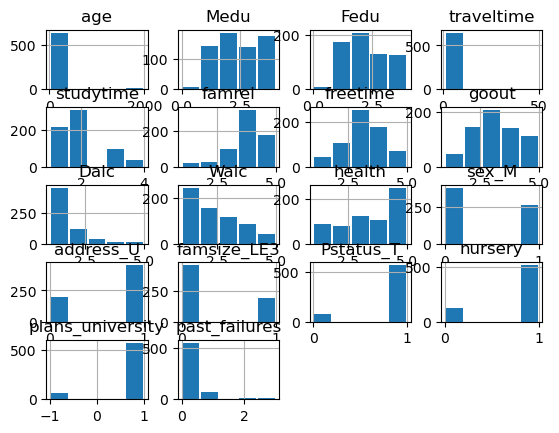

In [51]:
import matplotlib.pyplot as plt

full_data = data.copy()
full_data = pd.concat([full_data, support], axis=1) # axis = 1 -> Добавление по горизонтали
full_data = pd.concat([full_data, summary_attendance], axis=1) # axis = 1 -> Добавление по горизонтали

data.hist(bins=5, rwidth= .9)

In [52]:
# что то не так с age и travel time

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,50.164869,2.514638,2.306626,1.747304,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,254.768848,1.134552,1.099931,2.716138,0.829510,0.955717,1.051093,1.174843,0.917715,1.279797,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1991.000000,4.000000,4.000000,50.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [53]:
# age - слишком большой, вероятно это год рождения студента

current_year = 2006

for i in range(len(data['age'])):
    if data['age'][i] > 1900:
        data['age'][i] = current_year - data['age'][i]

In [54]:
# остался большой travel time

for i in range(len(data['traveltime'])):
    Z = data['traveltime'][i]
    if Z > 4:
        if Z < 15:
            data['traveltime'][i] = 1
        elif Z < 30:
            data['traveltime'][i] = 2
        elif Z < 60:
            data['traveltime'][i] = 3
        else:
            data['traveltime'][i] = 4

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.174843,0.917715,1.279797,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказаниепосчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

In [55]:
import sklearn
from sklearn import linear_model

normalized_data = normalize(data)

model = linear_model.LinearRegression().fit(normalized_data, score) #create model and train it

bad = []
errors = []

for i in range(len(data['age'])):
    x_test = [normalized_data.iloc[i]]
    y_ans = score[i]
#     print(x_test)
    prediction = model.predict(x_test)
    error = (prediction[0] - y_ans)**2 #simple error - square error
    errors.append(error)
    bad.append([error, i])
    
bad.sort(reverse=True)

for i in range(len(bad)):
    print(bad[i][0], model.predict([normalized_data.iloc[bad[i][1]]]) , score[bad[i][1]], data.iloc[bad[i][1]])

C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not ha

0.43174828824472955 [0.65707556] 0.0 age                 18.0
Medu                 4.0
Fedu                 2.0
traveltime           1.0
studytime            2.0
famrel               5.0
freetime             3.0
goout                1.0
Dalc                 1.0
Walc                 1.0
health               5.0
sex_M                0.0
address_U            0.0
famsize_LE3          1.0
Pstatus_T            0.0
nursery              1.0
plans_university     1.0
past_failures        0.0
Name: 354, dtype: float64
0.42259213044045535 [0.65707087] 0.006999999999999999 age                 17.0
Medu                 3.0
Fedu                 4.0
traveltime           1.0
studytime            3.0
famrel               4.0
freetime             4.0
goout                5.0
Dalc                 1.0
Walc                 3.0
health               5.0
sex_M                0.0
address_U            1.0
famsize_LE3          0.0
Pstatus_T            1.0
nursery              1.0
plans_university     1.0
past_fai

C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not ha

0.015635177563944315 [0.6750407] 0.55 age                 16.0
Medu                 4.0
Fedu                 4.0
traveltime           2.0
studytime            1.0
famrel               5.0
freetime             1.0
goout                3.0
Dalc                 1.0
Walc                 2.0
health               5.0
sex_M                0.0
address_U            1.0
famsize_LE3          1.0
Pstatus_T            1.0
nursery              1.0
plans_university     1.0
past_failures        0.0
Name: 133, dtype: float64
0.015541154377850554 [0.62533583] 0.75 age                 17.0
Medu                 4.0
Fedu                 3.0
traveltime           2.0
studytime            2.0
famrel               2.0
freetime             5.0
goout                5.0
Dalc                 1.0
Walc                 4.0
health               5.0
sex_M                1.0
address_U            1.0
famsize_LE3          1.0
Pstatus_T            1.0
nursery              1.0
plans_university     1.0
past_failures        0

C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vinik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not ha

In [56]:
# Плохо предсказывает людей, которые набрали 0 баллов на экзамене

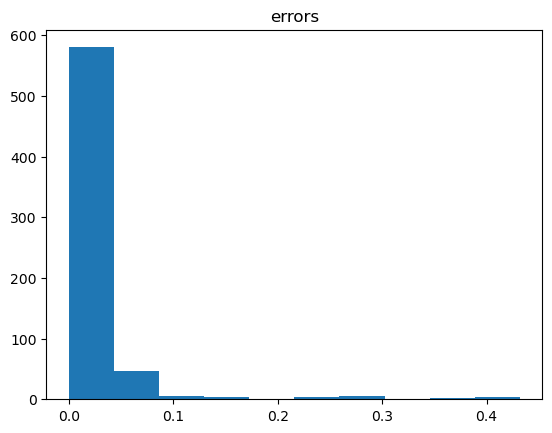

In [57]:
from matplotlib import pyplot as plt

plt.hist(errors) 
plt.title("errors") 
plt.show()

### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# делаем обучающую выборку
    
X_train, X_test, y_train, y_test = train_test_split(normalized_data, score, test_size=0.1)

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

prediction = model.predict(X_test)

# ans = sum((np.array(prediction) - np.array(y_test)) ** 2) / len(erorrs)

ans = mean_squared_error(prediction, y_test)

print(ans)

0.02044811050416304


Значения получаются в диапозоне (0.018, 0.03) и зависят от рандома, попробуем немного поменять features, которые мы используем*

In [63]:
# делаем обучающую выборку

favourite = ['age', 'freetime', 'studytime', 'past_failures', 'summary_attendance']

again = full_data.copy()

again = normalize(again)
    
X_train, X_test, y_train, y_test = train_test_split(again, score, test_size=0.1)

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

prediction = model.predict(X_test)

# ans = sum((np.array(prediction) - np.array(y_test)) ** 2) / len(erorrs)

ans = mean_squared_error(prediction, y_test)

print(ans)

0.01498698906965906


После того, как сократил количество feautures, вроде бы качество предсказания увеличилось, *удалось достичь ошибки 0.015*.

# Отчет по изменению качества обучения модели

Разница в замене Nan на среднее арифмитическое или медиану оказалась несущественной.

Нормализация данных не сильно повлияла на качество обучения, однако стоит отметить, что нормализировать нужно после того, как исправишь все выбросы и неточности в датасете.

Добавление дополнительных данных - *school_support* и *attendance* частично помогли качеству обучения модели. Но с другой стороны, кажется при добавлении всех данных посещаемости (30+ столбцов) модель банально научилась запоминать данные, из-за чего могла просто запомнить большинство данных.

Некоторых учеников, которые набрали ~0 баллов на тесте, модель также тяжело могла предсказать, потому что такие данные выбиваются из общих.

Также увелечинию качества обучения помог shuffle датасета, а также выбор определенных *features*, вместо всех 20 признаков, так как некоторые из них никак не помогали предсказывать данные, или помогали, но слабо.